In [1]:
%matplotlib inline


# Giant Component


This example illustrates the sudden appearance of a
giant connected component in a binomial random graph.



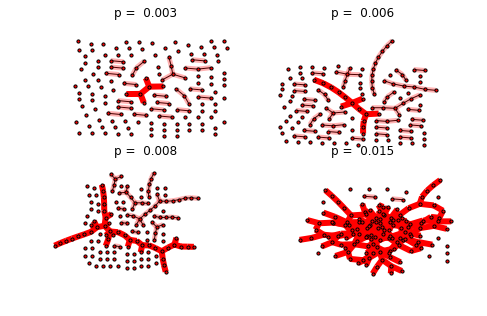

In [2]:
#    Copyright (C) 2006-2018
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import math

import matplotlib.pyplot as plt
import networkx as nx

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
    layout = graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
        layout = graphviz_layout
    except ImportError:
        print("PyGraphviz and pydot not found;\n"
              "drawing with spring layout;\n"
              "will be slow.")
        layout = nx.spring_layout


n = 150  # 150 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant = 1.0 / (n - 1)
# p value at which graph is expected to become completely connected
p_conn = math.log(n) / float(n)

# the following range of p values should be close to the threshold
pvals = [0.003, 0.006, 0.008, 0.015]

region = 220  # for pylab 2x2 subplot layout
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.01, hspace=0.01)
for p in pvals:
    G = nx.binomial_graph(n, p)
    pos = layout(G)
    region += 1
    plt.subplot(region)
    plt.title("p = %6.3f" % (p))
    nx.draw(G, pos,
            with_labels=False,
            node_size=10
           )
    # identify largest connected component
    Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
    G0 = Gcc[0]
    nx.draw_networkx_edges(G0, pos,
                           with_labels=False,
                           edge_color='r',
                           width=6.0
                          )
    # show other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(Gi, pos,
                                   with_labels=False,
                                   edge_color='r',
                                   alpha=0.3,
                                   width=5.0
                                  )
plt.show()